In [15]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_rm_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [16]:
data

['t_n55          7.1310 ( 6.6424,  7.9909) ( 6.5840,  7.8524)  1.2684 (Jnode 106)\n',
 't_n56          6.9592 ( 6.5676,  7.7170) ( 6.5208,  7.5917)  1.0709 (Jnode 105)\n',
 't_n57          6.5534 ( 6.2093,  7.2680) ( 6.1635,  7.1356)  0.9721 (Jnode 104)\n',
 't_n58          5.5418 ( 5.3082,  6.1341) ( 5.2857,  6.0045)  0.7188 (Jnode 103)\n',
 't_n59          5.3776 ( 5.1595,  5.9533) ( 5.1521,  5.8200)  0.6678 (Jnode 102)\n',
 't_n60          5.1399 ( 4.9172,  5.6882) ( 4.8876,  5.5727)  0.6851 (Jnode 101)\n',
 't_n61          4.7918 ( 4.5618,  5.3080) ( 4.5217,  5.2033)  0.6816 (Jnode 100)\n',
 't_n62          2.1378 ( 1.8525,  2.4673) ( 1.8336,  2.4433)  0.6097 (Jnode 99)\n',
 't_n63          3.3343 ( 3.0753,  3.7241) ( 3.0446,  3.6805)  0.6359 (Jnode 98)\n',
 't_n64          2.3894 ( 2.1529,  2.6956) ( 2.1322,  2.6642)  0.5319 (Jnode 97)\n',
 't_n65          2.1209 ( 1.9001,  2.4016) ( 1.8886,  2.3832)  0.4945 (Jnode 96)\n',
 't_n66          1.6625 ( 1.4739,  1.8968) ( 1.4665,  1.88

In [17]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [18]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [19]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [20]:
posterior_mean_iqtree

[7.131,
 6.9592,
 6.5534,
 5.5418,
 5.3776,
 5.1399,
 4.7918,
 2.1378,
 3.3343,
 2.3894,
 2.1209,
 1.6625,
 1.1464,
 0.7653,
 0.3081,
 2.5094,
 5.2463,
 5.0538,
 4.7739,
 3.4344,
 3.0909,
 2.66,
 5.0964,
 4.8708,
 4.6826,
 4.3968,
 4.0214,
 3.9054,
 3.4342,
 3.1493,
 2.9052,
 2.2044,
 2.0413,
 3.4498,
 2.8149,
 4.995,
 1.0897,
 4.8604,
 4.5751,
 4.115,
 3.8475,
 2.8632,
 3.2663,
 3.9407,
 3.7846,
 3.5267,
 2.6502,
 3.3989,
 5.9312,
 4.4068,
 2.7616,
 2.0564,
 4.7797]

In [21]:
lower_ci_iqtree

[6.6424,
 6.5676,
 6.2093,
 5.3082,
 5.1595,
 4.9172,
 4.5618,
 1.8525,
 3.0753,
 2.1529,
 1.9001,
 1.4739,
 1.001,
 0.6586,
 0.2547,
 2.263,
 5.0188,
 4.7788,
 4.5388,
 3.1544,
 2.8074,
 2.3216,
 4.8656,
 4.6352,
 4.4457,
 4.1608,
 3.7948,
 3.6757,
 3.211,
 2.9341,
 2.6959,
 2.0168,
 1.857,
 3.2137,
 2.5802,
 4.7609,
 0.863,
 4.6274,
 4.348,
 3.8858,
 3.6196,
 2.6243,
 3.0337,
 3.711,
 3.5536,
 3.2801,
 2.4054,
 3.1048,
 5.6017,
 4.0395,
 2.4022,
 1.6954,
 4.1405]

In [22]:
upper_ci_iqtree

[7.9909,
 7.717,
 7.268,
 6.1341,
 5.9533,
 5.6882,
 5.308,
 2.4673,
 3.7241,
 2.6956,
 2.4016,
 1.8968,
 1.3241,
 0.8932,
 0.3711,
 2.8378,
 5.8075,
 5.6094,
 5.2875,
 3.84,
 3.4696,
 3.0535,
 5.6446,
 5.396,
 5.1869,
 4.8735,
 4.4606,
 4.3331,
 3.8173,
 3.5074,
 3.2413,
 2.4717,
 2.295,
 3.8417,
 3.149,
 5.5321,
 1.3466,
 5.3879,
 5.0723,
 4.5645,
 4.2734,
 3.2059,
 3.6415,
 4.3744,
 4.2063,
 3.9252,
 2.9837,
 3.81,
 6.5828,
 4.9464,
 3.1926,
 2.4616,
 5.7142]

In [23]:
file_LG = open("LG_rm_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

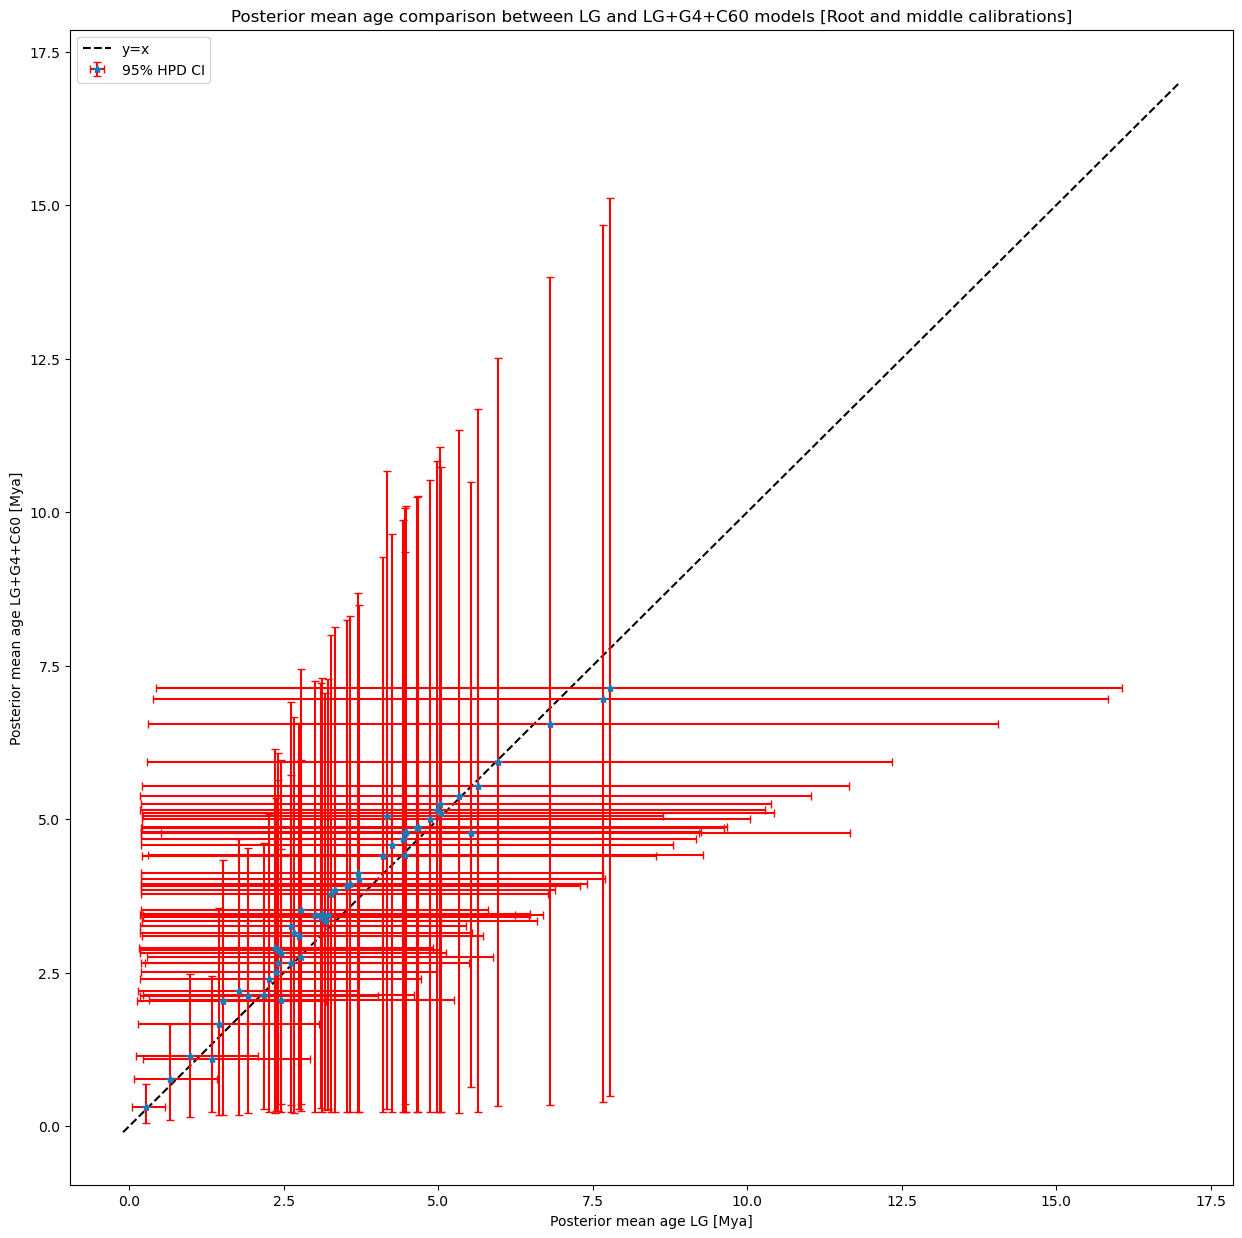

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C60 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 models [Root and middle calibrations]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C60_rm.png')

In [25]:
posterior_mean_baseml

[7.7849,
 7.6699,
 6.8023,
 5.6364,
 5.3342,
 4.9732,
 4.4709,
 2.1818,
 3.1726,
 2.2545,
 1.915,
 1.4557,
 0.985,
 0.6623,
 0.2666,
 2.3801,
 5.0243,
 4.1661,
 4.4558,
 3.2081,
 2.738,
 2.6102,
 5.0426,
 4.6715,
 4.4281,
 4.1093,
 3.7154,
 3.5173,
 3.0049,
 2.6629,
 2.3555,
 1.7708,
 1.5151,
 3.121,
 2.4551,
 4.8584,
 1.3449,
 4.6474,
 4.25,
 3.6941,
 3.3207,
 2.4083,
 2.6172,
 3.5711,
 3.2618,
 2.7861,
 2.412,
 3.1008,
 5.9664,
 4.4581,
 2.7833,
 2.4609,
 5.5276]

In [26]:
posterior_mean_iqtree

[7.131,
 6.9592,
 6.5534,
 5.5418,
 5.3776,
 5.1399,
 4.7918,
 2.1378,
 3.3343,
 2.3894,
 2.1209,
 1.6625,
 1.1464,
 0.7653,
 0.3081,
 2.5094,
 5.2463,
 5.0538,
 4.7739,
 3.4344,
 3.0909,
 2.66,
 5.0964,
 4.8708,
 4.6826,
 4.3968,
 4.0214,
 3.9054,
 3.4342,
 3.1493,
 2.9052,
 2.2044,
 2.0413,
 3.4498,
 2.8149,
 4.995,
 1.0897,
 4.8604,
 4.5751,
 4.115,
 3.8475,
 2.8632,
 3.2663,
 3.9407,
 3.7846,
 3.5267,
 2.6502,
 3.3989,
 5.9312,
 4.4068,
 2.7616,
 2.0564,
 4.7797]

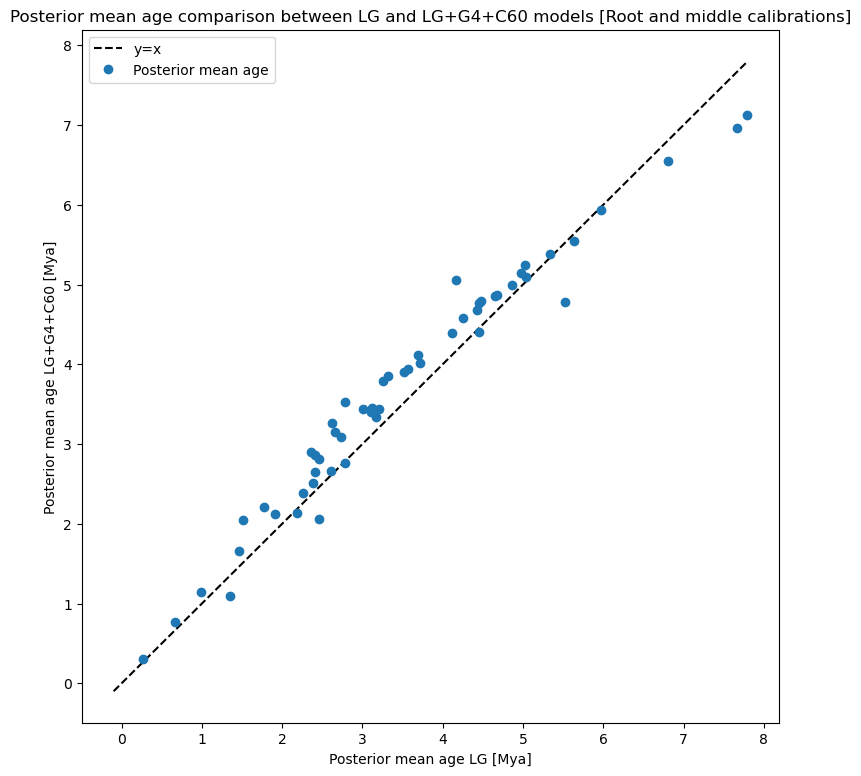

In [27]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot([-0.1,7.8], 
        [-0.1, 7.8], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C60 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 models [Root and middle calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C60_rm_scatter.png')